In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\NiShah'

In [3]:
#importing csv file from desktop folder where saved
df = pd.read_csv(r"C:/Users/NiShah/OneDrive - Healthfirst/Desktop/2021 Audits/LGCC Data Analytics/Python Assignment 3 - NYPD Arrest Data/NYPD_Arrest_Data__Year_to_Date.csv")

In [4]:
df.head ()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,9/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [5]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [11]:
# change arrest_boro abbreviation to long form
boro_dict = {
    'B': 'Bronx',
    'S': 'Staten Island',
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
}
df['ARREST_BORO'] = df.ARREST_BORO.replace(boro_dict)

# change perp_sex abbreviation to long form
perp_sex_dict = {
    'F': 'Female',
    'M': 'Male',
}
df['PERP_SEX'] = df.PERP_SEX.replace(perp_sex_dict)

# change law_cat_cd abbreviation to long form
law_cat_cd_dict = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation',
    'I': 'Traffic Infraction',
}
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace(law_cat_cd_dict)

In [12]:
#displaying the dataset
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Queens,105,97,18-24,Male,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,Felony,Brooklyn,69,71,25-44,Male,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,Felony,Brooklyn,61,0,25-44,Male,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,Felony,Bronx,42,71,18-24,Male,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,9/28/2021,578.0,NaN,NaN,NaN,PL 2223001,Misdemeanor,Bronx,44,0,25-44,Male,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Bronx,46,0,45-64,Male,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,2/3/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,Felony,Brooklyn,67,0,18-24,Male,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,2/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Staten Island,121,0,45-64,Male,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,1/4/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,Felony,Brooklyn,73,0,25-44,Male,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)


In [14]:
# Dropping all columns not useful from my dataset.
df=df.drop(df.columns[[14,15,16,17,18]],axis=1)

In [50]:
#Get a list of the columns left in the dataset
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Year',
       'Month', 'Day'],
      dtype='object')

In [51]:
#Grouping and counting crimes by type
crimes_by_type = df.OFNS_DESC.value_counts().sort_values(ascending = False)[:20]

In [52]:
#displaying the crimes by type dataset
crimes_by_type

ASSAULT 3 & RELATED OFFENSES      26855
FELONY ASSAULT                    15579
PETIT LARCENY                     13178
DANGEROUS DRUGS                   10450
MISCELLANEOUS PENAL LAW           10328
CRIMINAL MISCHIEF & RELATED OF     9294
ROBBERY                            7848
DANGEROUS WEAPONS                  7206
GRAND LARCENY                      6671
VEHICLE AND TRAFFIC LAWS           5264
BURGLARY                           4895
OFFENSES AGAINST PUBLIC ADMINI     4682
OFFENSES INVOLVING FRAUD           3832
SEX CRIMES                         3586
OFF. AGNST PUB ORD SENSBLTY &      3345
FORGERY                            3127
INTOXICATED & IMPAIRED DRIVING     2334
POSSESSION OF STOLEN PROPERTY      1858
OTHER TRAFFIC INFRACTION           1632
MURDER & NON-NEGL. MANSLAUGHTE     1513
Name: OFNS_DESC, dtype: int64

Text(0, 0.5, 'Number of Arrests')

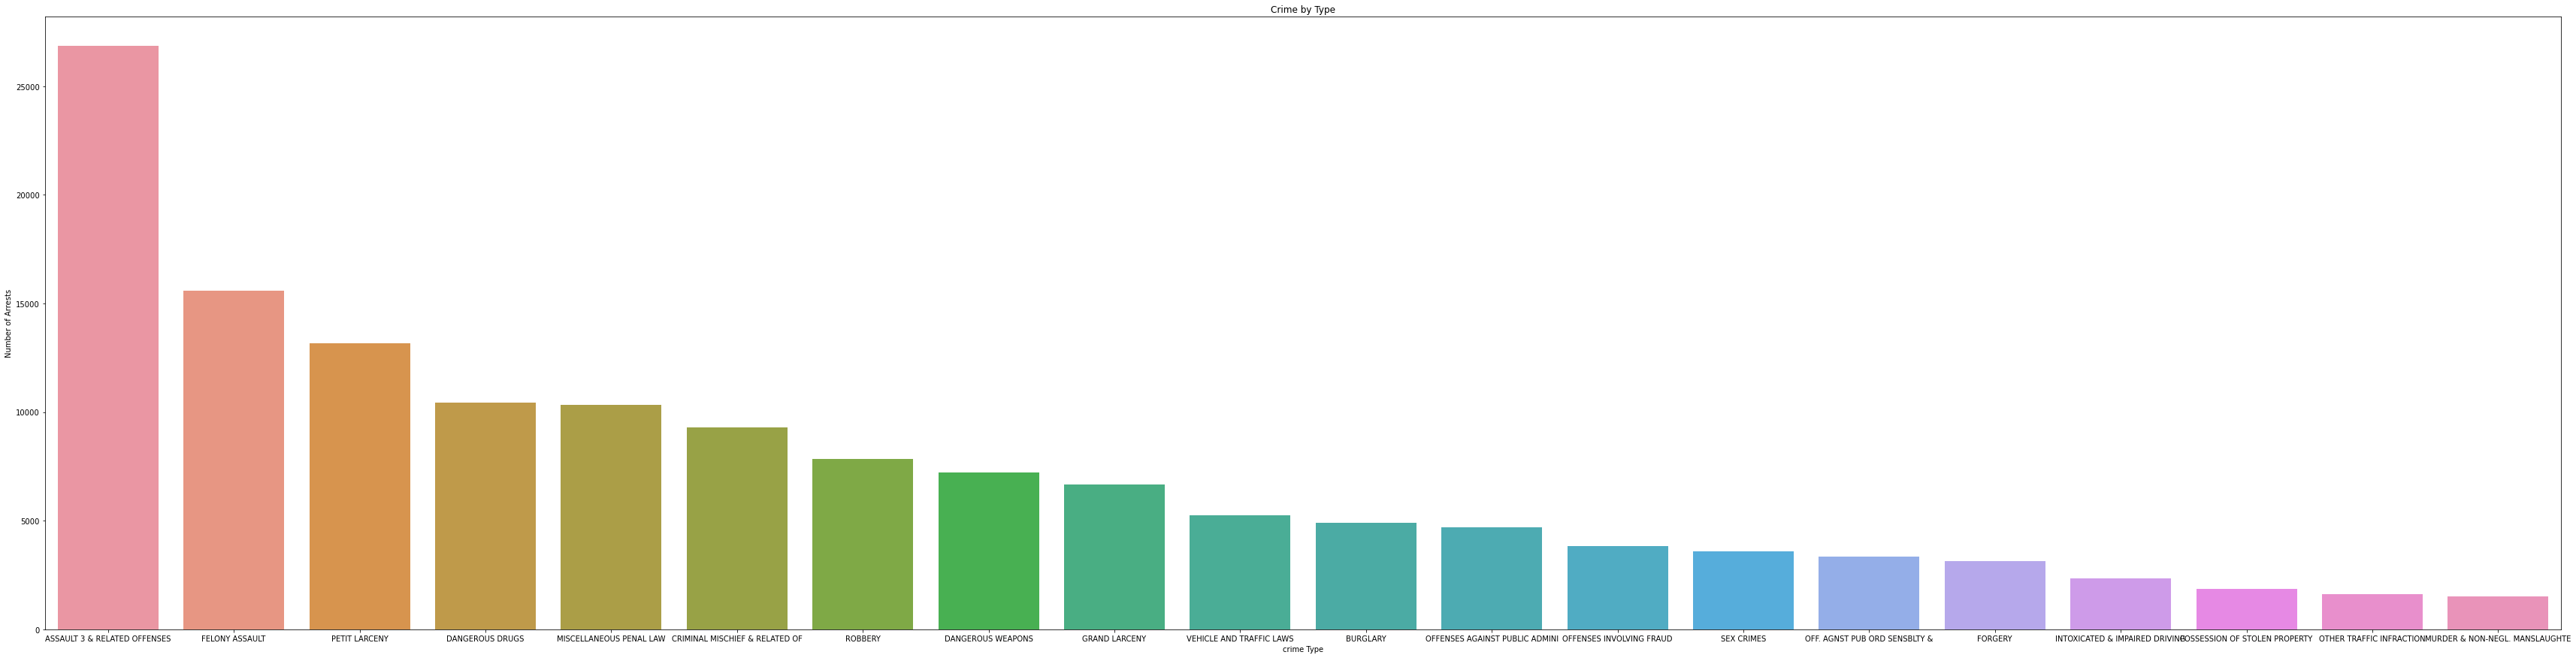

In [55]:
#Bar graph shouwing the crime counts by type - Majoriy of the crimes are assaults
plt.figure(figsize=(60,15))
sns.barplot(x=crimes_by_type.index, y = crimes_by_type )
plt.title("Crime by Type")
plt.xlabel("crime Type")
plt.ylabel("Number of Arrests")

In [60]:
#Groupoing and Counting crimes by category
crimes_by_category = df.LAW_CAT_CD.value_counts().sort_values(ascending = False)[:10]

In [61]:
#displaying the crimes by category dataset
crimes_by_category

Misdemeanor           82632
Felony                70867
Violation               385
Traffic Infraction      230
Name: LAW_CAT_CD, dtype: int64

Text(0, 0.5, 'Number of Arrests')

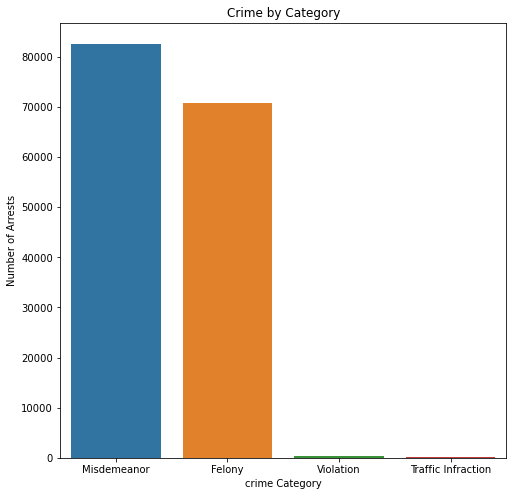

In [66]:
#Bar graph shouwing the crime counts by category - Majority of the crimes are misdemeanors followed by felonies
plt.figure(figsize=(8,8))
sns.barplot(x=crimes_by_category.index, y = crimes_by_category )
plt.title("Crime by Category")
plt.xlabel("crime Category")
plt.ylabel("Number of Arrests")

In [16]:
#Counting crimes by age group
crimes_by_age = df.AGE_GROUP.value_counts().sort_values(ascending = False)[:5]

In [17]:
#displaying the crimes by age dataset
crimes_by_age[:]

25-44    88850
45-64    30608
18-24    28951
<18       4800
65+       2298
Name: AGE_GROUP, dtype: int64

Text(0, 0.5, 'Number of Arrests')

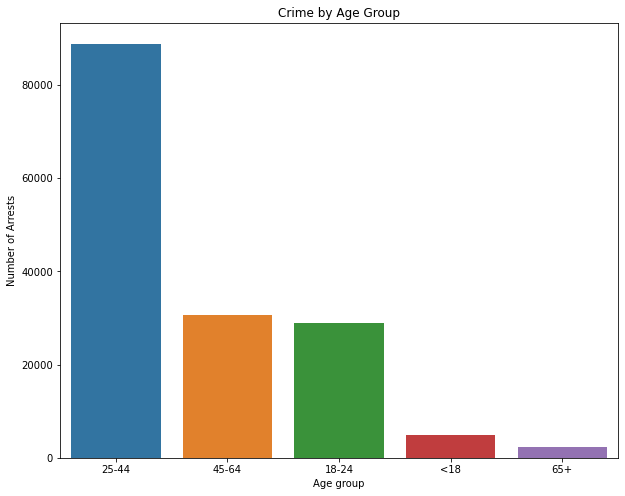

In [18]:
#Bar graph shouwing the crime counts by age group - The age group committing the most crimes was 25-44 and least was less than 18 or over 65
plt.figure(figsize=(10,8))
sns.barplot(x=crimes_by_age.index, y = crimes_by_age )
plt.title("Crime by Age Group")
plt.xlabel("Age group")
plt.ylabel("Number of Arrests")

In [20]:
#Grouping and counting crimes by borough
crimes_by_city = df.ARREST_BORO.value_counts().sort_values(ascending = False)[:10]

In [21]:
#displaying the crimes by city (borough) counts 
crimes_by_city[:]

Brooklyn         41550
Manhattan        39677
Bronx            34018
Queens           33051
Staten Island     7211
Name: ARREST_BORO, dtype: int64

Text(0, 0.5, 'Number of Arrests')

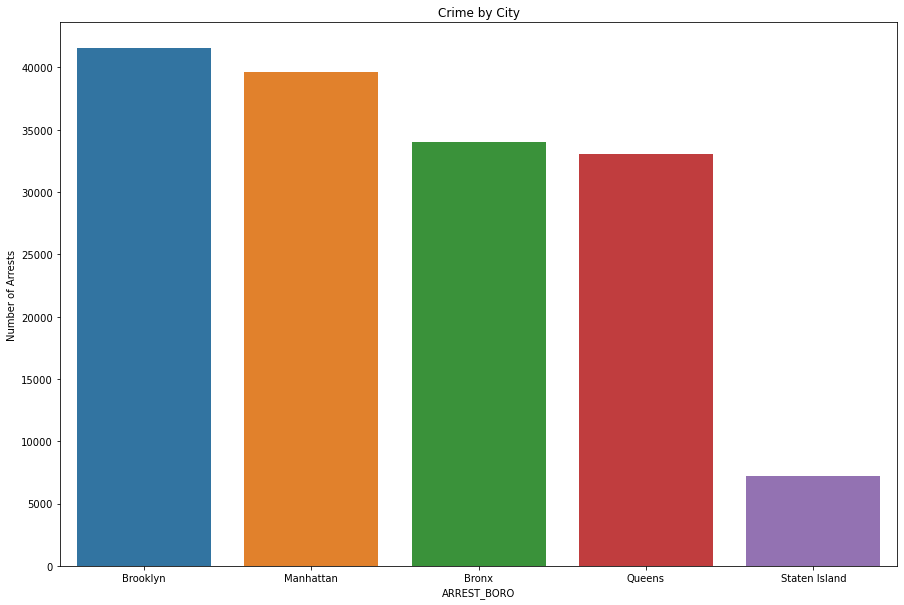

In [22]:
#Bar graph shouwing the crime counts by borough -Brookly had the most crimes committed and Staten Island the least
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_city.index, y = crimes_by_city )
plt.title("Crime by City")
plt.xlabel("ARREST_BORO")
plt.ylabel("Number of Arrests")

In [23]:
df['Year'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[-1]))

In [24]:
df['Month'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[0]))

In [25]:
df['Day'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[1]))

In [28]:
#Grouping and counting crimes by month
crimes_by_month = df.Month.value_counts()

In [29]:
#Displaying crime by month dataset
crimes_by_month[:]

10    14453
3     13980
9     13756
8     13745
7     13561
1     13506
11    13068
6     12850
12    12689
5     11822
2     11653
4     10424
Name: Month, dtype: int64

Text(0, 0.5, 'Number of Arrests')

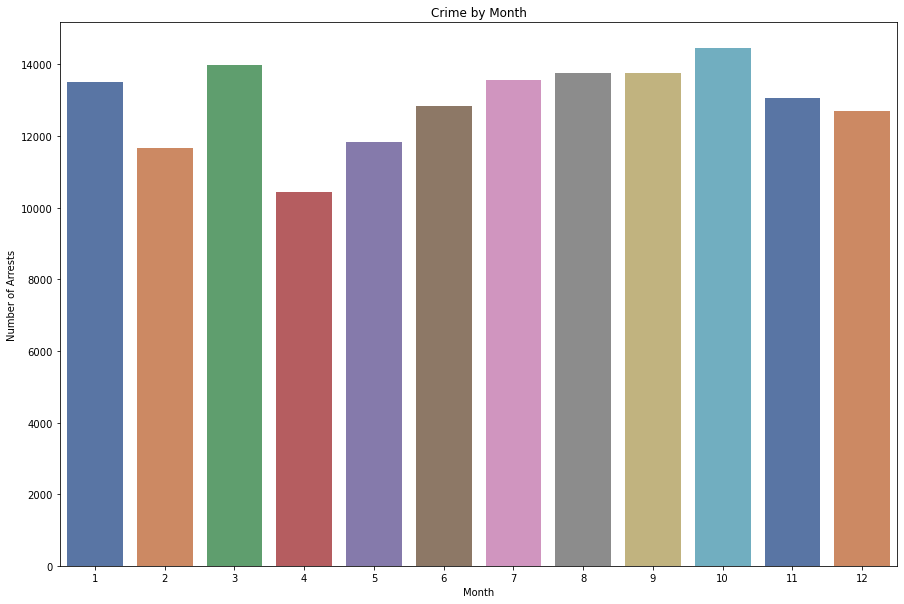

In [71]:
#Bar graph shouwing the crime counts by month - More crimes occorred in October than any month of the year and the least crimes occorred in April 
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_month.index, y = crimes_by_month,palette='deep' )
plt.title("Crime by Month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [33]:
#Grouping and counting arrest by race
arrest_by_race = df.PERP_RACE.value_counts().sort_values()

In [34]:
#displaying the arrest by race dataset
arrest_by_race 

AMERICAN INDIAN/ALASKAN NATIVE      443
UNKNOWN                             587
ASIAN / PACIFIC ISLANDER           8593
BLACK HISPANIC                    13576
WHITE                             17063
WHITE HISPANIC                    38112
BLACK                             77133
Name: PERP_RACE, dtype: int64

In [36]:
#Removing the null (other, unknown) value counts
arrest_by_race = arrest_by_race[~arrest_by_race.index.isin(["OTHER","UNKNOWN"])]

In [37]:
#displaying the arrest by race dataset after removal of unknown - Asians and American Indians/Alaskan committed the least crimes
arrest_by_race

AMERICAN INDIAN/ALASKAN NATIVE      443
ASIAN / PACIFIC ISLANDER           8593
BLACK HISPANIC                    13576
WHITE                             17063
WHITE HISPANIC                    38112
BLACK                             77133
Name: PERP_RACE, dtype: int64

<AxesSubplot:title={'center':'Number of Arrets by Race'}, xlabel='PERP_RACE', ylabel='Race'>

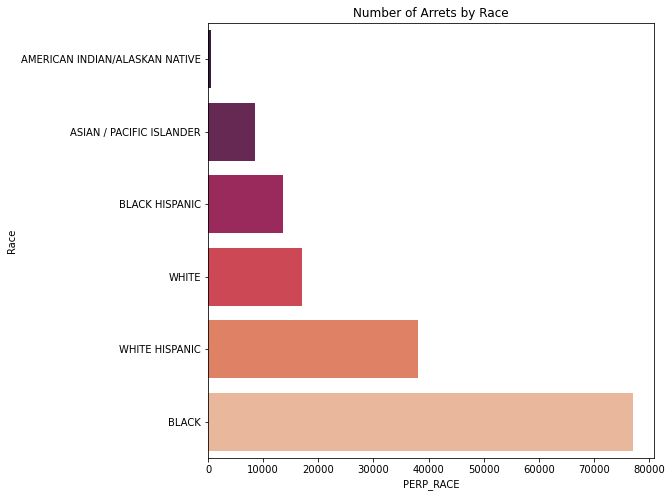

In [38]:
plt.figure(figsize = (8,8))
plt.xlabel("Number of Arrests")
plt.title('Number of Arrets by Race')
plt.ylabel('Race')
sns.barplot(x = arrest_by_race, y = arrest_by_race.index,palette='rocket')

In [39]:
#grouping and countinf of arrests by gender
arrests_by_sex = df.PERP_SEX.value_counts()

In [40]:
#displaying the arrest by sex dataset - Men committed the most crimes
arrests_by_sex

Male      128910
Female     26597
Name: PERP_SEX, dtype: int64

Text(0, 0.5, 'Arrests')

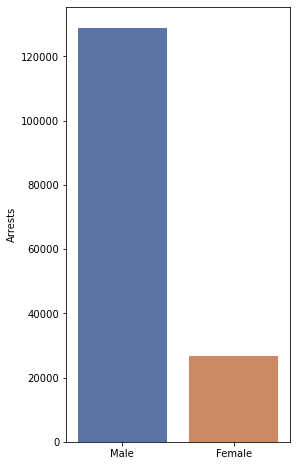

In [41]:
plt.figure(figsize = (4,8))
sns.barplot(y = arrests_by_sex, x = arrests_by_sex.index,palette='deep')
plt.ylabel("Arrests")